<a href="https://colab.research.google.com/github/KavishaMadani/machine-learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Kavisha Madani


Student ID: 202318007

Question 1.
Perform binary classification using logistic regression on the data in file “Social Network Ads.csv” which is a
categorical dataset to determine whether a user purchased a product or not by using three features.
1. Visualize the data by 3D plotting features using different colors for label 0 and 1.
2. Implement the logistic function and learn the model parameters using
• Stochastic gradient descent method.
• Newton’s method (iteratively reweighted least squares method). Does IRLS method converge in
lesser number of iterations than GD?
• available library function and compare your results.
3. Plot the training data, test data and decision boundary learnt by logistic regression in the same figure.
(should be a straight line showing the boundary separating the region where hw(x) > 0.5 from the
region where hw(x) ≤ 0.5 (hw(x
(i)
) = σ(wT x
(i)
))) for the above three results.

Use 90% data points from each set for training and the remaining 10% for testing

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, f1_score

In [ ]:
data = pd.read_csv("/content/Social_Network_Ads - Social_Network_Ads.csv")
fig = px.scatter_3d(data, x='Age', y='EstimatedSalary', z='Purchased',
                    color='Purchased', labels={'Age': 'Age', 'EstimatedSalary': 'Estimated Salary', 'Purchased': 'Purchased'})
fig.show()

In [ ]:
# Preprocessing
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression_sgd(X, y, learning_rate=0.01, n_iterations=1000):
    m, n = X.shape
    intercept = np.ones((m, 1))
    X = np.concatenate((intercept, X), axis=1)
    theta = np.zeros(n + 1)

    for iteration in range(n_iterations):
        for i in range(m):
            z = np.dot(X[i], theta)
            h = sigmoid(z)
            gradient = (y[i] - h) * X[i]
            theta += learning_rate * gradient

    return theta

def logistic_regression_irls(X, y, n_iterations=100):
    m, n = X.shape
    intercept = np.ones((m, 1))
    X = np.concatenate((intercept, X), axis=1)
    theta = np.zeros(n + 1)

    for iteration in range(n_iterations):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (y - h))
        Hessian = np.dot(X.T, np.dot(np.diag(h * (1 - h)), X))
        theta += np.dot(np.linalg.inv(Hessian), gradient)

    return theta

# Stochastic Gradient Descent
theta_sgd = logistic_regression_sgd(X_train_scaled, y_train)

# Newton's Method
theta_irls = logistic_regression_irls(X_train_scaled, y_train)

# Using scikit-learn's logistic regression implementation
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Stochastic Gradient Descent
y_pred_sgd = (sigmoid(np.dot(np.concatenate((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled), axis=1), theta_sgd)) >= 0.5).astype(int)
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
precision_sgd = precision_score(y_test, y_pred_sgd)
recall_sgd = recall_score(y_test, y_pred_sgd)
f1_sgd = f1_score(y_test, y_pred_sgd)

# Newton's Method
y_pred_irls = (sigmoid(np.dot(np.concatenate((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled), axis=1), theta_irls)) >= 0.5).astype(int)
accuracy_irls = accuracy_score(y_test, y_pred_irls)
precision_irls = precision_score(y_test, y_pred_irls)
recall_irls = recall_score(y_test, y_pred_irls)
f1_irls = f1_score(y_test, y_pred_irls)

# Using scikit-learn's logistic regression implementation
y_pred_sklearn = log_reg.predict(X_test_scaled)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn)
f1_sklearn = f1_score(y_test, y_pred_sklearn)

print("Stochastic Gradient Descent:")
print("Accuracy:", accuracy_sgd)
print("Precision:", precision_sgd)
print("Recall:", recall_sgd)
print("F1 Score:", f1_sgd)

print("\nNewton's Method (IRLS):")
print("Accuracy:", accuracy_irls)
print("Precision:", precision_irls)
print("Recall:", recall_irls)
print("F1 Score:", f1_irls)

print("\nScikit-learn Logistic Regression:")
print("Accuracy:", accuracy_sklearn)
print("Precision:", precision_sklearn)
print("Recall:", recall_sklearn)
print("F1 Score:", f1_sklearn)

Stochastic Gradient Descent:
Accuracy: 0.9
Precision: 0.8461538461538461
Recall: 0.8461538461538461
F1 Score: 0.8461538461538461

Newton's Method (IRLS):
Accuracy: 0.9
Precision: 0.8461538461538461
Recall: 0.8461538461538461
F1 Score: 0.8461538461538461

Scikit-learn Logistic Regression:
Accuracy: 0.9
Precision: 0.8461538461538461
Recall: 0.8461538461538461
F1 Score: 0.8461538461538461


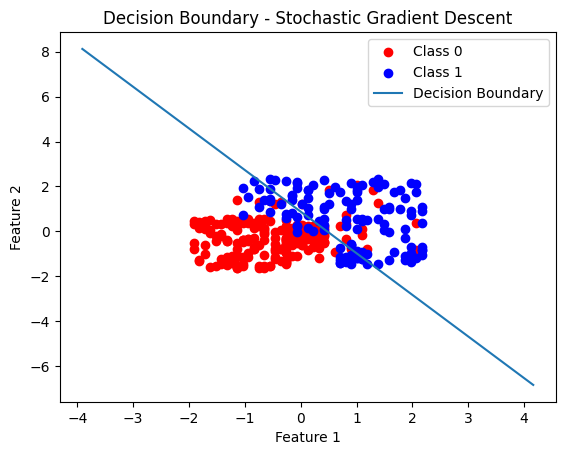

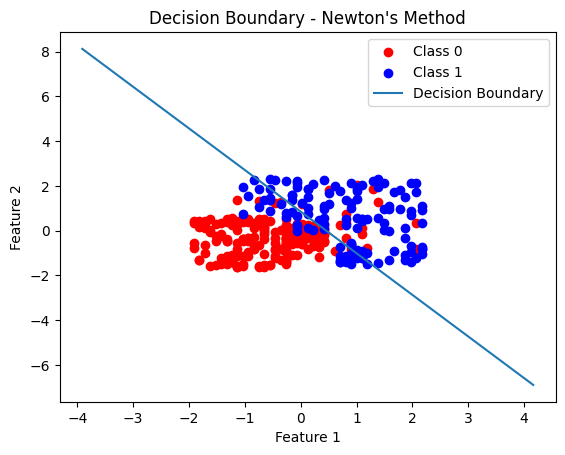

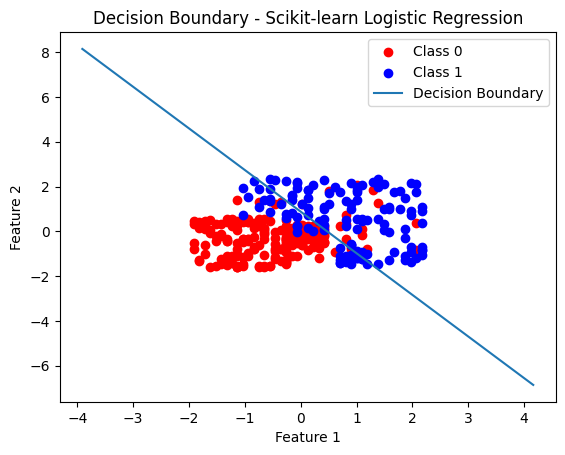

In [ ]:
def plot_decision_boundary(X, y, theta, title):
    plt.figure()
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
    x_values = [np.min(X[:, 0] - 2), np.max(X[:, 0] + 2)]
    y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]
    plt.plot(x_values, y_values, label='Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot the decision boundary for Stochastic Gradient Descent
plot_decision_boundary(X_train_scaled, y_train, theta_sgd, 'Decision Boundary - Stochastic Gradient Descent')

# Plot the decision boundary for Newton's Method
plot_decision_boundary(X_train_scaled, y_train, theta_irls, 'Decision Boundary - Newton\'s Method')

# Plot the decision boundary for Scikit-learn Logistic Regression
plot_decision_boundary(X_train_scaled, y_train, np.append(log_reg.intercept_, log_reg.coef_), 'Decision Boundary - Scikit-learn Logistic Regression')

Question 2.
Perform binary Classification using logistic regression on a widely used dataset- Iris dataset. It contains four
features (sepal length, sepal width, petal length, and petal width) of 50 samples of three species of Iris (Iris
setosa, Iris virginica, and Iris versicolor).
1. Plot features’ histogram. Compute pdf and compare it with histogram.
2. perform the exploratory data analysis by plotting the basic statistics like mean, median, min, and
max value of each feature (sepal and petal lengths and widths) for each of the three classes (setosa,
virginica, and versicolor)
3. Visualize the data in the Iris Dataset by considering maximum combinations of two features in a 2D
plot. Use red, green, and blue colors for labeling the three classes: Iris setosa, Iris virginica, and Iris
versicolor, respectively. Comment on whether any two classes among the three can be separated by a
line? Report your observations for each case.
4. Implement the logistic function and learn the model parameters using
• Stochastic gradient descent method.
• Newton’s method (iteratively reweighted least squares method). Does IRLS method converge in
lesser number of iterations than GD?
• available library function and compare your results.
5. Plot the training data, test data and decision boundary learnt by logistic regression in the same figure.
(should be a straight line showing the boundary separating the region where hw(x) > 0.5 from the
region where hw(x) ≤ 0.5 (hw(x
(i)
) = σ(wT x
(i)
))) for the above three results.
6. Using confusion matrix, find accuracy, precision, F1 score and recall.

In [ ]:
import seaborn as sns
from scipy.stats import norm
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

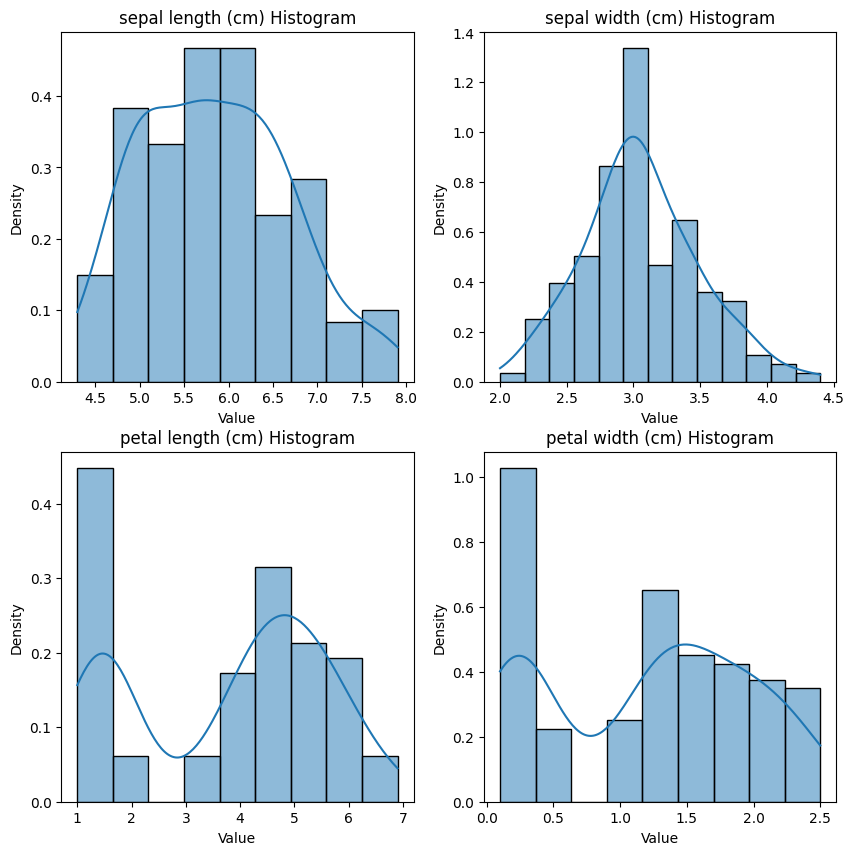

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target
plt.figure(figsize=(10, 10))
for i in range(X.shape[1]):
    plt.subplot(2, 2, i+1)
    sns.histplot(X[:, i], kde=True, stat='density')
    plt.title(f'{iris.feature_names[i]} Histogram')
    plt.xlabel('Value')
    plt.ylabel('Density')

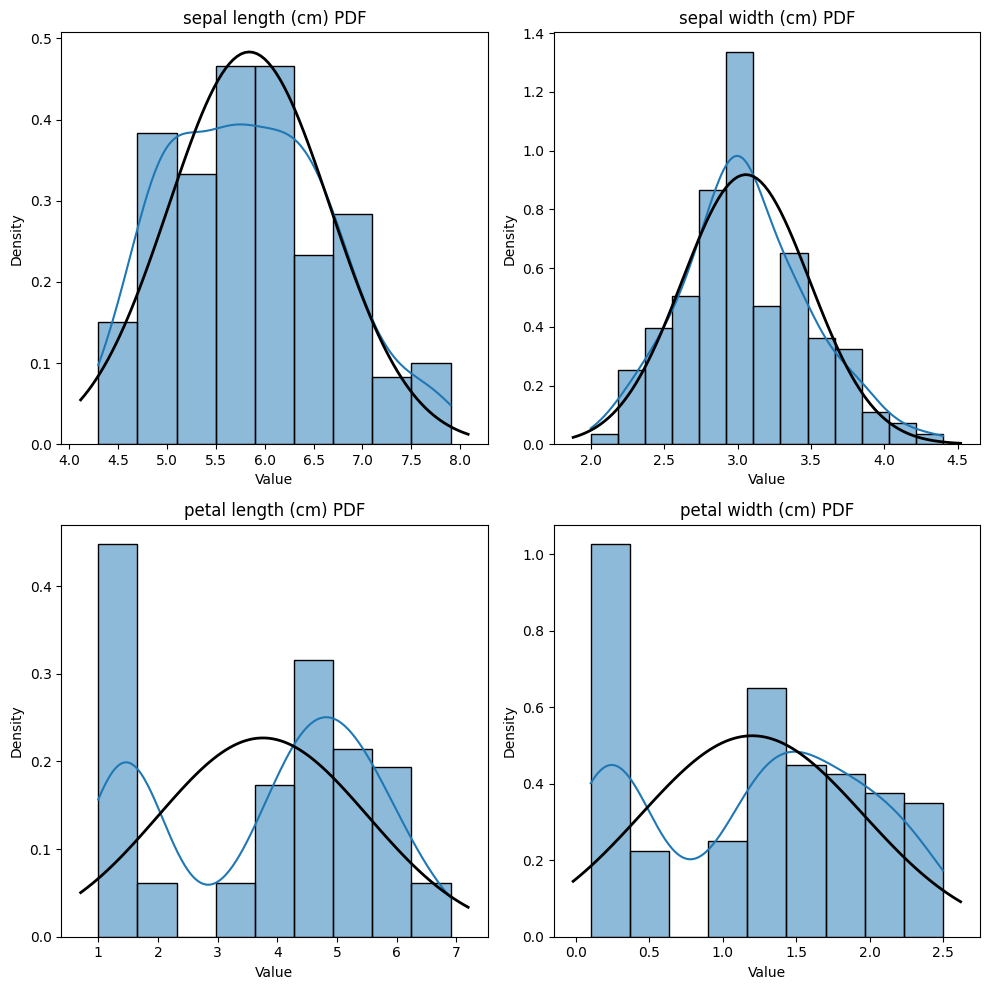

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(X.shape[1]):
    plt.subplot(2, 2, i+1)
    sns.histplot(X[:, i], kde=True, stat='density')
    plt.title(f'{iris.feature_names[i]} PDF')
    plt.xlabel('Value')
    plt.ylabel('Density')\
    mu, std = norm.fit(X[:, i])
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
plt.tight_layout()
plt.show()

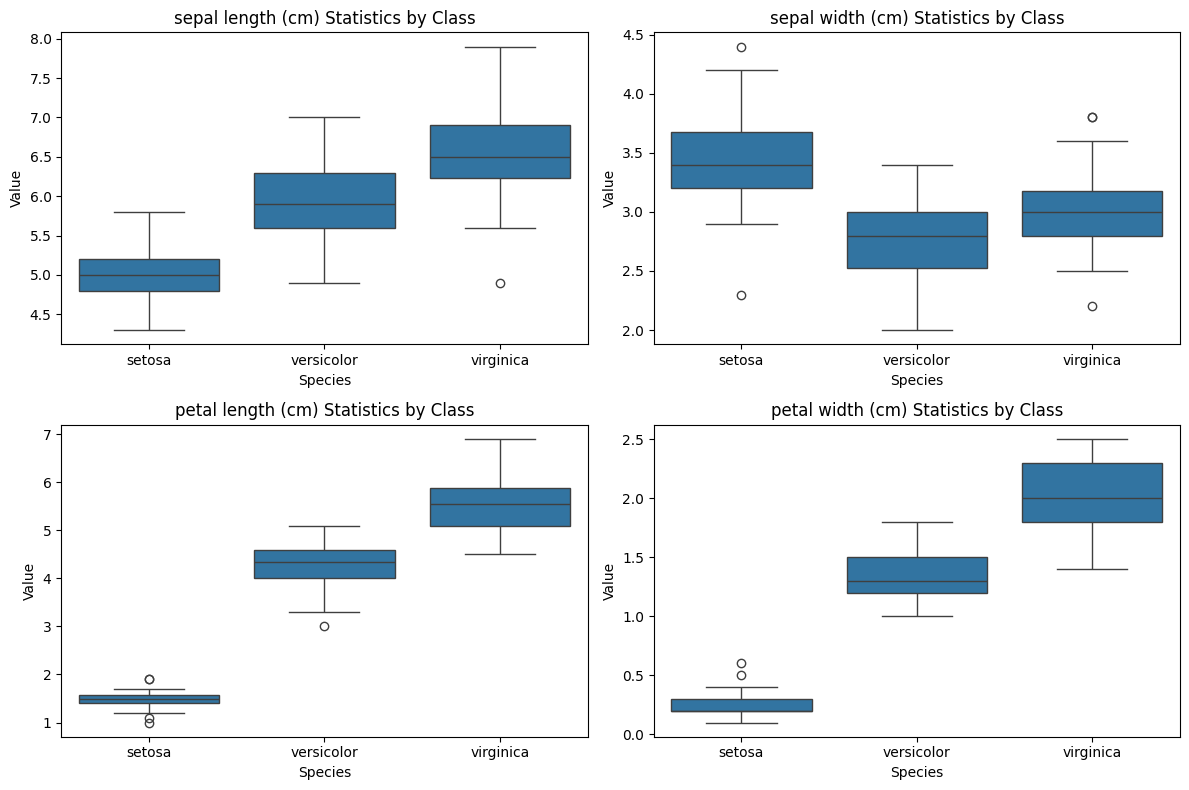

In [ ]:
feature_names = iris.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['Species'] = iris.target_names[y]

plt.figure(figsize=(12, 8))
for i, feature in enumerate(feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Species', y=feature, data=df)
    plt.title(f'{feature} Statistics by Class')
    plt.xlabel('Species')
    plt.ylabel('Value')
plt.tight_layout()
plt.show()

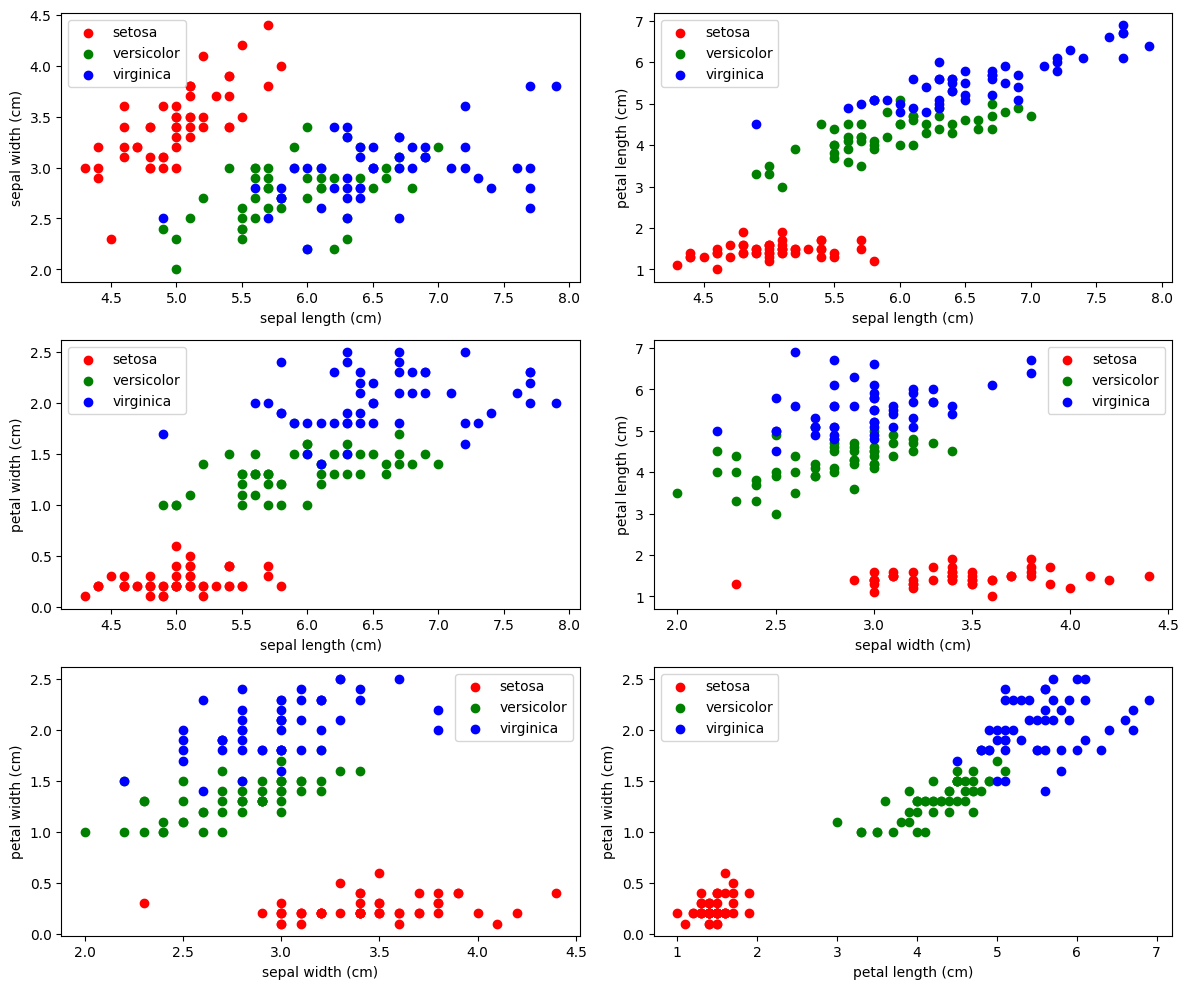

In [ ]:
class_names = iris.target_names
colors = ['r', 'g', 'b']
feature_names = iris.feature_names
combinations = [(i, j) for i in range(4) for j in range(i+1, 4)]
plt.figure(figsize=(12, 10))
for idx, (i, j) in enumerate(combinations):
    plt.subplot(3, 2, idx + 1)
    for target_class, color in zip(range(len(class_names)), colors):
        plt.scatter(X[y == target_class, i], X[y == target_class, j], c=color, label=class_names[target_class])
    plt.xlabel(feature_names[i])
    plt.ylabel(feature_names[j])
    plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression_sgd(X, y, learning_rate=0.01, n_iterations=1000):
    m, n = X.shape
    intercept = np.ones((m, 1))
    X = np.concatenate((intercept, X), axis=1)
    theta = np.zeros(n + 1)

    for iteration in range(n_iterations):
        for i in range(m):
            z = np.dot(X[i], theta)
            h = sigmoid(z)
            gradient = (y[i] - h) * X[i]
            theta += learning_rate * gradient

    return theta

def logistic_regression_irls(X, y, n_iterations=100):
    m, n = X.shape
    intercept = np.ones((m, 1))
    X = np.concatenate((intercept, X), axis=1)
    theta = np.zeros(n + 1)

    for iteration in range(n_iterations):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (y - h))
        Hessian = np.dot(X.T, np.dot(np.diag(h * (1 - h)), X))
        theta += np.dot(np.linalg.inv(Hessian), gradient)

    return theta

from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Get the learned parameters
theta_sklearn = np.append(log_reg.intercept_, log_reg.coef_)

# Stochastic Gradient Descent
y_pred_sgd = (sigmoid(np.dot(np.concatenate((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled), axis=1), theta_sgd)) >= 0.5).astype(int)
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
precision_sgd = precision_score(y_test, y_pred_sgd)
recall_sgd = recall_score(y_test, y_pred_sgd)
f1_sgd = f1_score(y_test, y_pred_sgd)

# Newton's Method
y_pred_irls = (sigmoid(np.dot(np.concatenate((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled), axis=1), theta_irls)) >= 0.5).astype(int)
accuracy_irls = accuracy_score(y_test, y_pred_irls)
precision_irls = precision_score(y_test, y_pred_irls)
recall_irls = recall_score(y_test, y_pred_irls)
f1_irls = f1_score(y_test, y_pred_irls)

# Using scikit-learn's logistic regression implementation
y_pred_sklearn = log_reg.predict(X_test_scaled)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn)
f1_sklearn = f1_score(y_test, y_pred_sklearn)


print("Stochastic Gradient Descent:")
print("Accuracy:", accuracy_sgd)
print("Precision:", precision_sgd)
print("Recall:", recall_sgd)
print("F1 Score:", f1_sgd)

print("\nNewton's Method (IRLS):")
print("Accuracy:", accuracy_irls)
print("Precision:", precision_irls)
print("Recall:", recall_irls)
print("F1 Score:", f1_irls)

print("\nScikit-learn Logistic Regression:")
print("Accuracy:", accuracy_sklearn)
print("Precision:", precision_sklearn)
print("Recall:", recall_sklearn)
print("F1 Score:", f1_sklearn)

Stochastic Gradient Descent:
Accuracy: 0.9
Precision: 0.8461538461538461
Recall: 0.8461538461538461
F1 Score: 0.8461538461538461

Newton's Method (IRLS):
Accuracy: 0.9
Precision: 0.8461538461538461
Recall: 0.8461538461538461
F1 Score: 0.8461538461538461

Scikit-learn Logistic Regression:
Accuracy: 0.375
Precision: 0.25
Recall: 0.46153846153846156
F1 Score: 0.32432432432432434


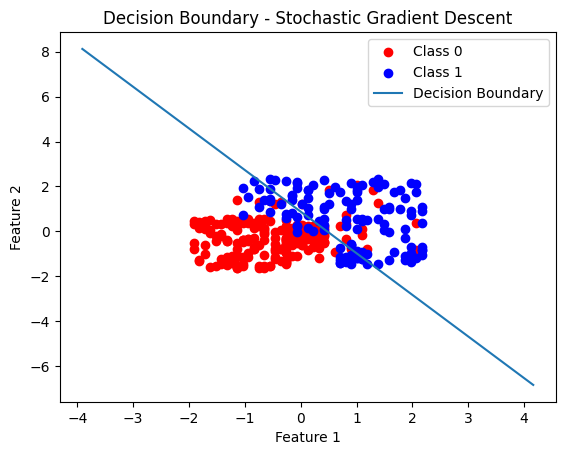

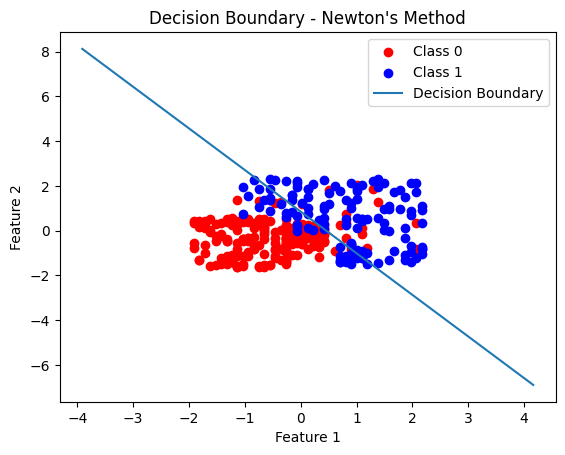

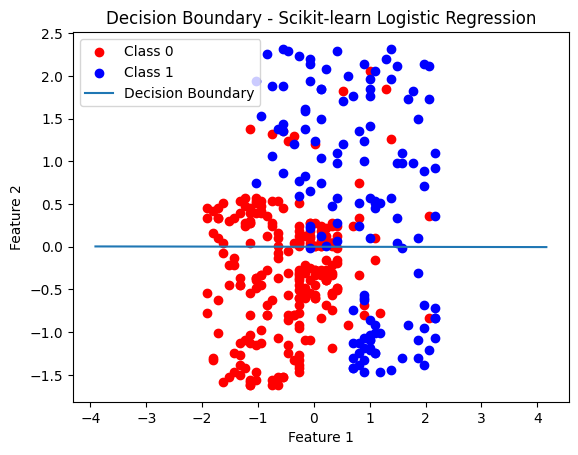

In [ ]:
def plot_decision_boundary(X, y, theta, title):
    plt.figure()
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
    x_values = [np.min(X[:, 0] - 2), np.max(X[:, 0] + 2)]
    y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]
    plt.plot(x_values, y_values, label='Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot the decision boundary for Stochastic Gradient Descent
plot_decision_boundary(X_train_scaled, y_train, theta_sgd, 'Decision Boundary - Stochastic Gradient Descent')

# Plot the decision boundary for Newton's Method
plot_decision_boundary(X_train_scaled, y_train, theta_irls, 'Decision Boundary - Newton\'s Method')

# Plot the decision boundary for Scikit-learn Logistic Regression
plot_decision_boundary(X_train_scaled, y_train, np.append(log_reg.intercept_, log_reg.coef_), 'Decision Boundary - Scikit-learn Logistic Regression')